## Step 1: Importing the required libraries

We are majorly using the scikit learn library, which comes with lots of pre-built functions and algorithms.

In [1]:
# import all required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
%precision 2
%matplotlib inline

'%.2f'

## Step 2: Importing dataset

In [2]:
# load dataset from the directory where your dataset is saved.
data = pd.read_csv('winequality-red.csv', sep=',')

In [3]:
# show dataset head to have a feel of the type of data you're working with.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# confirm non-null values
# null values affect the accuracy of your model. If found, either avoid using such features or use the optional...
# ...method of averages.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Step 3: Preprocessing data

Here we simply state our good and bad quality wine rules, transform the data as needed and assign x and y features.

In [6]:
# preprocess the data
# starting from good and bad wine quality rules
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
data['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
# use the labelencoder
data['quality'] = LabelEncoder().fit_transform(data['quality'])

In [8]:
# show dataset head again to confirm quality transformation
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
# assign X and y features
X = data.drop('quality', axis = 1)
y = data['quality']

Let's have a look at the number of good vs bad wine plot.

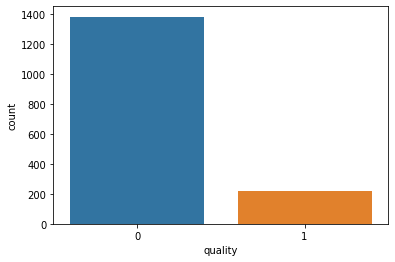

In [10]:
sns.countplot(data['quality'])

In [11]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [12]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

To avoid bias, we use the StandardScaler from sklearn to ensure that all features are treated equally.

In [13]:
# apply standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 4: Applying Machine Learning Algorithms

The sklearn library also comes with several algorithms that can be applied easily and quickly. Since this is a classification problem, where output can only be good (1) or bad (0), let's try to use these three well known algorithms. You may include decision trees in your version of code.

# Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(n_estimators = 200)
# fit in the data
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [15]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### RFC model accuracy 

In [16]:
# use the confusion_matrix and classification_report to measure model accuracy
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
rfc_accuracy = accuracy_score(y_test, pred_rfc)
print('Model Accuracy:', str(rfc_accuracy * 100) + '%')

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[264   9]
 [ 23  24]]
Model Accuracy: 90.0%


The random forest algoritm is 90% accurate. This is pretty good, can it be better? Let's try two more algorithms

# SVM Classifier

In [17]:
clf = svm.SVC()
# fit in the training data
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [18]:
pred_clf[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### SVM model accuracy

In [19]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
clf_accuracy = accuracy_score(y_test, pred_clf)
print('Model Accuracy:', str(clf_accuracy * 100) + '%')

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]
Model Accuracy: 87.5%


The SVM classifier also did a good job. Albeit, with an accuracy of 90%, it is safe to say the Random Forest Classifier is still our go-to algorithm. What about neural networks? Let's see how that will perform on our data.

# Neural Networks

In [20]:
mlpc = MLPClassifier(hidden_layer_sizes = (11, 11, 11), max_iter = 2000)
# fit in the training set
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [21]:
pred_mlpc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

### Neural Networks accuracy

In [22]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
mlpc_accuracy = accuracy_score(y_test, pred_mlpc)
print('Model Accuracy:', str(mlpc_accuracy * 100) + '%')

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.51      0.59        47

    accuracy                           0.89       320
   macro avg       0.80      0.74      0.76       320
weighted avg       0.88      0.89      0.89       320

[[262  11]
 [ 23  24]]
Model Accuracy: 89.375%


This is really good as well. It goes to show that you may select either Random Forest Classifier or Neural Networks for this problem. However, when results are too close in this kind of case, it is important to choose an algorithm based on the time it takes it to run. 

# Test New Data

In [23]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [24]:
# test new data
Xnew = [[7.5, 0.60, 0.06, 1.5, 0.055, 13.0, 30.0, 0.9950, 3.33, 0.56, 9.8]]
Xnew = sc.transform(Xnew)
ynew_rfc = rfc.predict(Xnew)
ynew_clf = clf.predict(Xnew)
ynew_mlpc = mlpc.predict(Xnew)
print('Wine quality (RFC):', ynew_rfc)
print('Wine quality (SVM):', ynew_clf)
print('Wine quality (Neural Networks):', ynew_mlpc)

Wine quality (RFC): [0]
Wine quality (SVM): [0]
Wine quality (Neural Networks): [0]


In [25]:
# test existing good wine
wine = [[7.8, 0.58, 0.02, 2.0, 0.073, 9.0, 18.0, 0.9968, 3.36, 0.57, 9.5]]
wine = sc.transform(wine)
ynew_rfc = rfc.predict(wine)
ynew_clf = clf.predict(wine)
ynew_mlpc = mlpc.predict(wine)
print('Wine quality (RFC):', ynew_rfc)
print('Wine quality (SVM):', ynew_clf)
print('Wine quality (Neural Networks):', ynew_mlpc)

Wine quality (RFC): [1]
Wine quality (SVM): [0]
Wine quality (Neural Networks): [0]


What esle? A good next step would be to try out more algoritms like decision trees or k-nearest neighbors. Then you can add code to check runtime of each algorithm and choose the optimal algorithm you wish.